# **Stationarity and Other Tests for Time Series**

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

In [42]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/airline_passengers.csv', parse_dates=True,index_col=0)

data.index.freq='MS'
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [32]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Augmented Dickey-Fuller unit root test**
https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
testdata= adfuller(data['Thousands of Passengers'])
dtout=pd.Series(testdata[0:4],index=['ADF test Statistic','p-value','#Lags Used','# Observations'])

In [9]:
for key,val in testdata[4].items():
    dtout[f'critical value ({key})']=val

dtout

ADF test Statistic        0.815369
p-value                   0.991880
#Lags Used               13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [27]:
if dtout[1] <= 0.05: 
    print('Data is stationary') 
else: 
    print('Data is not stationary')

Data is not stationary


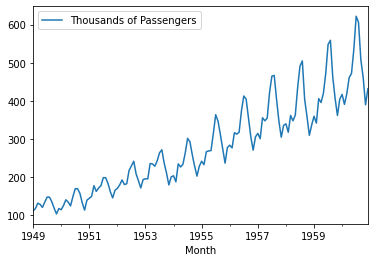

In [28]:
data.plot()

**Granger Causality Test**
https://en.wikipedia.org/wiki/Granger_causality

In [35]:
#Importing the DataFrame
data2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/samples.csv', parse_dates=True,index_col=0)
data2.index.freq='MS'
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1950-01-01 to 1959-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       120 non-null    int64
 1   b       120 non-null    int64
 2   c       120 non-null    int64
 3   d       120 non-null    int64
dtypes: int64(4)
memory usage: 4.7 KB


In [36]:
data2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


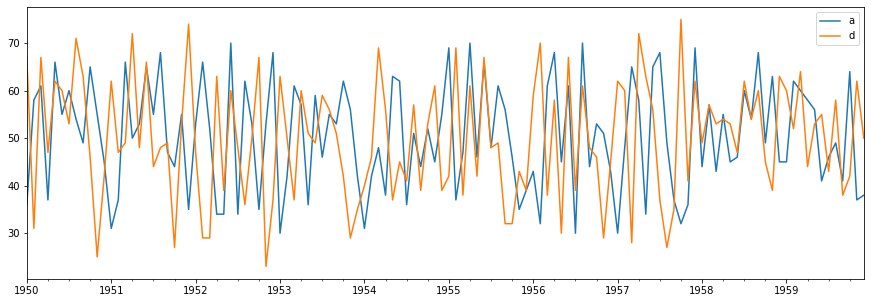

In [37]:
data2[['a','d']].plot(figsize=(15,5))

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests

In [39]:
grangercausalitytests(data2[['a','d']],maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681275, 0.1942027811635669, 116.0, 1.0),
   'ssr_chi2test': (1.7492231682328025, 0.18597442074424253, 1),
   'ssr_ftest': (1.70512510516811, 0.1942027811635688, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (212.65135382912013, 6.658022084670888e-47, 2),
   'params_ftest': (286.03394262556435, 6.025362015677438e-45, 113.0, 2.0),
   'ssr_chi2test': (597.3806235365698, 1.907417667905223e-130, 2),
   'ssr_ftest': (286.033942625561, 6.025362015680817e-45, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (212.4788575746154, 8.480665715595584e-46, 3),
   'params_ftest': (188.74462328615994, 3.2288482941487054e-43, 110.0, 3.0),
   'ssr_chi2test': (602.2669343040274, 3.2505045874681137e-130, 3),
   'ssr_ftest': (188.7446232861624, 3.2288482941467694e-43, 110.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


After lag 2 low p-values are displayed. This means causality exists.

In [40]:
grangercausalitytests(data2[['b','d']],maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


{1: ({'lrtest': (1.5517414581131561, 0.21287853854122682, 1),
   'params_ftest': (1.5225271098610056, 0.2197316060388175, 116.0, 1.0),
   'ssr_chi2test': (1.5619028109780568, 0.2113868295267818, 1),
   'ssr_ftest': (1.5225271098609627, 0.2197316060388281, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.9051081656513134, 0.636001674473408, 2),
   'params_ftest': (0.435044413491397, 0.6483153418342347, 113.0, 2.0),
   'ssr_chi2test': (0.9085883326015723, 0.6348959407829671, 2),
   'ssr_ftest': (0.4350444134914308, 0.6483153418342141, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.6895254112311022, 0.6392650421085297, 3),
   'params_ftest': (0.5333223212193041, 0.6603817798496447, 110.0, 3.0),
   'ssr_chi2test': (1.7017830431634933, 0.6365374570974172, 3),
   'ssr_ftest': (0.5333223212193283, 0.6603817798496251, 110.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

No causality exists in this case

**Seasonality Checks with Statsmodels**

In [43]:
data.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

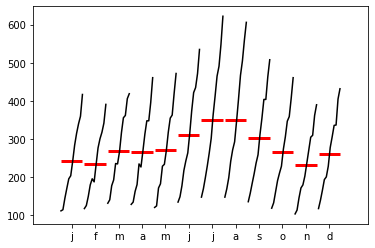

In [47]:
month_plot(data['Thousands of Passengers']);

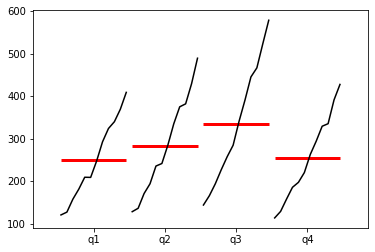

In [52]:
dataq=data['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dataq);